<a href="https://colab.research.google.com/github/Israel-Garcilazo/EDP1/blob/main/Funci%C3%B3n_De_Pulso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representación de la Función Pulso Unitario mediante Integral de Fourier
Este notebook aborda la representación de la función pulso unitario usando la transformada de Fourier, y compara la función original con aproximaciones usando límites finitos en la integral.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.integrals.transforms import fourier_transform, inverse_fourier_transform
sp.init_printing(use_unicode=True)

## a) Gráfica de la función pulso unitario

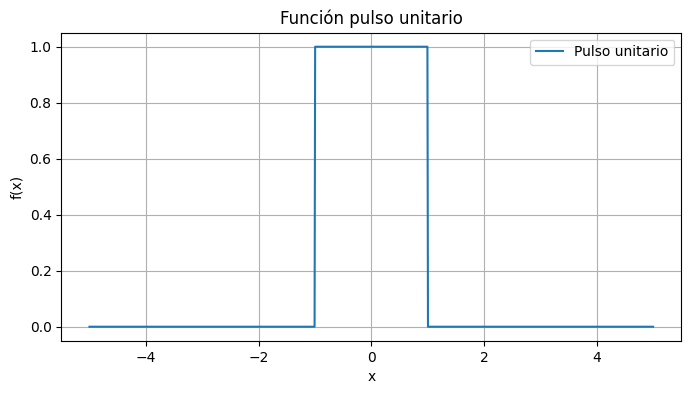

In [2]:
x_vals = np.linspace(-5, 5, 1000)
pulse = np.where((x_vals >= -1) & (x_vals <= 1), 1, 0)

plt.figure(figsize=(8, 4))
plt.plot(x_vals, pulse, label='Pulso unitario')
plt.title('Función pulso unitario')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

## b) Representación como integral de Fourier (forma simbólica)

In [3]:
x, w = sp.symbols('x w', real=True)
f = sp.Piecewise((1, (x >= -1) & (x <= 1)), (0, True))
F_w = fourier_transform(f, x, w)
f_rec = inverse_fourier_transform(F_w, w, x)
F_w, f_rec

⎛⎧sin(2⋅π⋅w)                                            ⎛⎧sin(2⋅π⋅w)           ↪
⎜⎪──────────  for w > 0 ∨ w < 0                         ⎜⎪──────────  for w >  ↪
⎜⎨   π⋅w                       , InverseFourierTransform⎜⎨   π⋅w               ↪
⎜⎪                                                      ⎜⎪                     ↪
⎝⎩    2           otherwise                             ⎝⎩    2           othe ↪

↪                ⎞⎞
↪ 0 ∨ w < 0      ⎟⎟
↪          , w, x⎟⎟
↪                ⎟⎟
↪ rwise          ⎠⎠

## c) Aproximaciones con límites finitos a=8, 32 (optimizado)

In [9]:
import scipy.integrate as integrate

def approx_fourier(x_vals, a):
    result = []
    for x in x_vals:
        integrand = lambda w: (2 * np.sin(w) / w) * np.cos(w * x) if w != 0 else 2
        val, _ = integrate.quad(integrand, -a, a, limit=200)
        result.append(val / (2 * np.pi))
    return np.array(result)

x_vals = np.linspace(-5, 5, 400)
approx_8 = approx_fourier(x_vals, 8)
approx_32 = approx_fourier(x_vals, 32)

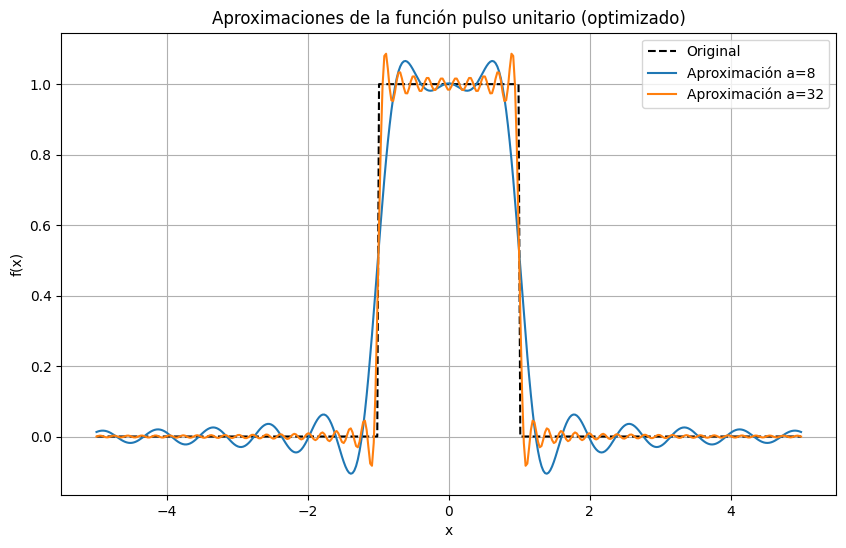

In [11]:
plt.figure(figsize=(10, 6))
# Recalculate pulse using the x_vals from section c)
pulse_for_plot = np.where((x_vals >= -1) & (x_vals <= 1), 1, 0)
plt.plot(x_vals, pulse_for_plot, 'k--', label='Original')
plt.plot(x_vals, approx_8, label='Aproximación a=8')
plt.plot(x_vals, approx_32, label='Aproximación a=32')
plt.title('Aproximaciones de la función pulso unitario (optimizado)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()